# Analise Exploratória de Dados - Cartão de Crédito na Índia

Este conjunto de dados contém informações sobre as transações dos cartões de créditos na Índia, oferecendo uma visão abrangente dos hábitos de consumo dos indianos em todo o país. Desde o gênero e o tipo de cartão usado para realizar cada transação, até qual cidade teve o maior valor de gastos e até mesmo que tipo de despesas foram feitas, este conjunto de dados traça um quadro geral sobre como o dinheiro que está sendo gasto na Índia hoje. 

Com a sua variedade de variáveis, com isso temos a oportunidade de descobrir tendências mais profundas nos gastos desses clientes, bem como correlações interessantes entre pontos de dados que podem servir como inteligência empresarial inestimável. 

Dados utilizados: [Credit Card Spendings](https://www.kaggle.com/datasets/ayushchandramaurya/credit-card-spendings) da plataforma do [Kaggle](https://www.kaggle.com/).


In [1]:
# Bibliotecas utilizadas:

import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from datetime import datetime

C:\Users\020747631\AppData\Local\Temp\ipykernel_20460\1247434761.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Configurando o Pandas:

pd.set_option('display.max.rows', None)
pd.set_option('display.max.columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Lendo o arquivo CSV:

df_ds = pd.read_csv('C:\projetos_data_science\projeto3\Credit_card_transactions_India_Simple.csv')

In [4]:
# Visualizando o número de linhas e colunas:

df_ds.shape

(26052, 7)

In [5]:
# Leitura dos dados do df_ds:

df_ds.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


- metadados do dataframe

    - City 
        - A cidade em que a transação ocorreu. (String)
    - Date 
        - A data da transação. (Date)
    - Card Type 
        - O tipo de cartão de crédito usado para a transação. (String)
    - Exp Type 
        - O tipo de despesa associada à transação. (String)
    - Gender
        - O sexo do titular do cartão. (String)
    - Amount
        - O valor da transação. (Número)


<h4 span style="color: red"> Visualizando as 20 primeiras Cidades (coluna City)</span>

In [6]:
df_ds['City'].value_counts().head(20)

City
Bengaluru, India           3552
Greater Mumbai, India      3493
Ahmedabad, India           3491
Delhi, India               3482
Hyderabad, India            784
Chennai, India              774
Kolkata, India              773
Kanpur, India               764
Lucknow, India              759
Jaipur, India               752
Surat, India                749
Pune, India                 747
Ramnagar, India              19
Kalyan-Dombivali, India      19
Vijayapura, India            15
Udaipur, India               15
Pratapgarh, India            14
Bathinda, India              14
Puliyankudi, India           14
Jind, India                  13
Name: count, dtype: int64

<h4 span style="color: red"> Visualizando informações de Data (coluna Date)</span>

In [7]:
# Converter para timestamps (datas completas)
data_inicial = pd.to_datetime(df_ds['Date'], format="%d-%b-%y").dt.date.min()
data_final = pd.to_datetime(df_ds['Date'], format="%d-%b-%y").dt.date.max()

# Calcular o intervalo (agora como diferença de datas)
intervalo = data_final - data_inicial
dias = intervalo.days

# Mostrar os resultados
print(f"Data inicial: {data_inicial}")
print(f"Data final: {data_final}")
print(f"Intervalo: {dias} dias")

Data inicial: 2013-10-04
Data final: 2015-05-26
Intervalo: 599 dias


<h4 span style="color: red"> Visualizando os Tipos de Cartões (coluna Card Type)</span>

In [8]:
df_ds['Card Type'].value_counts().head

<bound method NDFrame.head of Card Type
Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: count, dtype: int64>

<h4 span style="color: red"> Visualizando os Tipos de Despesas (coluna Exp Type)</span>

In [9]:
df_ds['Exp Type'].value_counts().head

<bound method NDFrame.head of Exp Type
Food             5463
Fuel             5257
Bills            5078
Entertainment    4762
Grocery          4754
Travel            738
Name: count, dtype: int64>

<h4 span style="color: red"> Visualizando o sexo do usuário do Cartão (coluna Gender)</span>

In [10]:
df_ds['Gender'].value_counts().head

<bound method NDFrame.head of Gender
F    13680
M    12372
Name: count, dtype: int64>

<h4 span style="color: red"> Visualizando a faixa de valores do Cartão (coluna Amount)</span>

In [11]:
menor_valor = df_ds['Amount'].min()
maior_valor = df_ds['Amount'].max()

print(f"Menor valor: {menor_valor}")
print(f"Maior valor: {maior_valor}")

Menor valor: 1005
Maior valor: 998077


<h5 span style="color: orange">Tipos de gastos do sexo Masculino.   (colunas Gender e Exp Type)</span>

In [12]:
df_ds[df_ds['Gender'] == 'M']['Exp Type'].value_counts()

Exp Type
Fuel             2640
Food             2451
Entertainment    2378
Grocery          2326
Bills            2218
Travel            359
Name: count, dtype: int64

<h5 span style="color: orange">Tipos de gastos do sexo Feminino.   (colunas Gender e Exp Type)</span>

In [13]:
df_ds[df_ds['Gender'] == 'F']['Exp Type'].value_counts()

Exp Type
Food             3012
Bills            2860
Fuel             2617
Grocery          2428
Entertainment    2384
Travel            379
Name: count, dtype: int64

<h5 span style="color: orange">Tipos de cartão usados pelo sexo Masculino.   (colunas Gender e Card Type)</span>

In [14]:
df_ds[df_ds['Gender'] == 'M']['Card Type'].value_counts()

Card Type
Platinum     3146
Gold         3080
Signature    3079
Silver       3067
Name: count, dtype: int64

<h5 span style="color: orange">Tipos de cartão usados pelo sexo Feminino.   (colunas Gender e Card Type)</span>

In [15]:
df_ds[df_ds['Gender'] == 'F']['Card Type'].value_counts()

Card Type
Silver       3773
Signature    3368
Gold         3287
Platinum     3252
Name: count, dtype: int64

<h5 span style="color: orange">Cidades com gastos do sexo Masculino (12 maiores).   (colunas Gender e City)</span>

In [16]:
df_ds[df_ds['Gender'] == 'M']['City'].value_counts().head(12)

City
Ahmedabad, India         1615
Bengaluru, India         1592
Greater Mumbai, India    1571
Delhi, India             1559
Kolkata, India            401
Chennai, India            400
Hyderabad, India          395
Pune, India               378
Surat, India              374
Lucknow, India            373
Kanpur, India             372
Jaipur, India             353
Name: count, dtype: int64

<h5 span style="color: orange">Cidades com gastos do sexo Feminino (12 maiores).   (colunas Gender e City)</span>

In [17]:
df_ds[df_ds['Gender'] == 'F']['City'].value_counts().head(12)

City
Bengaluru, India         1960
Delhi, India             1923
Greater Mumbai, India    1922
Ahmedabad, India         1876
Jaipur, India             399
Kanpur, India             392
Hyderabad, India          389
Lucknow, India            386
Surat, India              375
Chennai, India            374
Kolkata, India            372
Pune, India               369
Name: count, dtype: int64

<h5 span style="color: orange">Maior e menor gasto do sexo Masculino.   (colunas Gender e Amount)</span>

In [18]:
menor_valor = df_ds[df_ds['Gender'] == 'M']['Amount'].min()
maior_valor = df_ds[df_ds['Gender'] == 'M']['Amount'].max()

print(f"Menor valor: {menor_valor}")
print(f"Maior valor: {maior_valor}")

Menor valor: 1018
Maior valor: 299981


<h5 span style="color: orange">Maior e menor gasto do sexo Feminino.   (colunas Gender e Amount)</span>

In [19]:
menor_valor = df_ds[df_ds['Gender'] == 'F']['Amount'].min()
maior_valor = df_ds[df_ds['Gender'] == 'F']['Amount'].max()

print(f"Menor valor: {menor_valor}")
print(f"Maior valor: {maior_valor}")

Menor valor: 1005
Maior valor: 998077


<h5 span style="color: orange">Visualizando graficamente os gastos médios por tipo de despesas.   (colunas Exp Type e Amount)</span>

(Text(0.5, 0, 'Valor médio da transação'), Text(0, 0.5, 'Tipo de Despesa'))

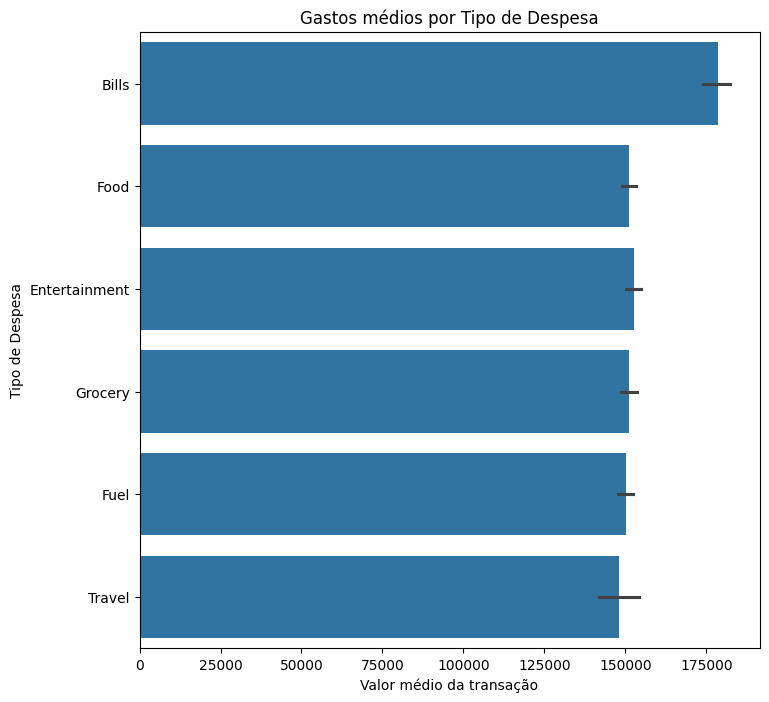

In [20]:
plt.subplots(figsize=(8,8))
sns.barplot(y='Exp Type',x='Amount', data = df_ds)
plt.title('Gastos médios por Tipo de Despesa')
plt.xlabel('Valor médio da transação'), plt.ylabel('Tipo de Despesa')

In [21]:
df_ds.groupby('Exp Type')['Amount'].mean().sort_values(ascending=False)

Exp Type
Bills           178627.90
Entertainment   152548.83
Grocery         151074.45
Food            150965.41
Fuel            150111.44
Travel          148042.83
Name: Amount, dtype: float64

<h5 span style="color: orange">Visualizando graficamente os gastos médios por tipo de cartão.   (colunas Card Type e Amount)</span>

(Text(0.5, 0, 'Valor médio da transação'), Text(0, 0.5, 'Tipo de Cartão'))

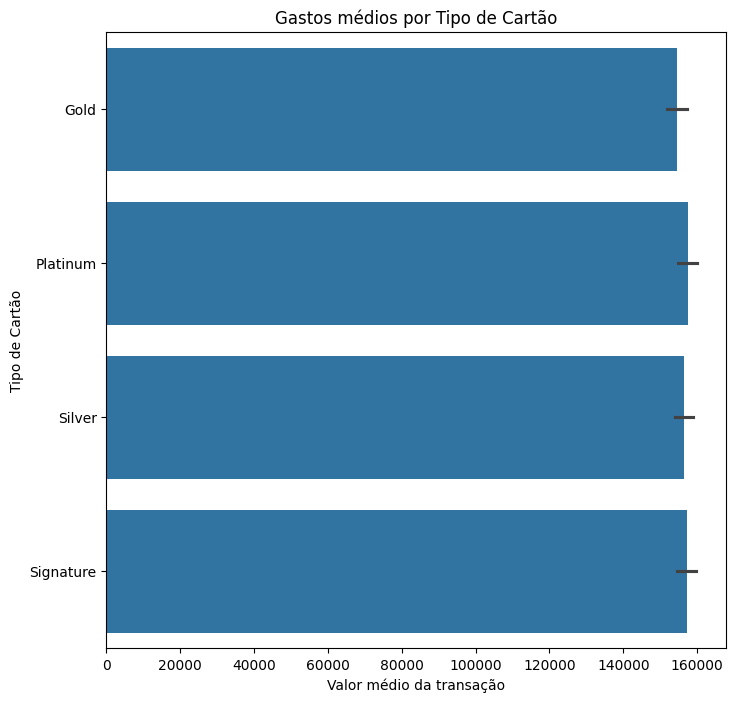

In [22]:
plt.subplots(figsize=(8,8))
sns.barplot(y='Card Type',x='Amount', data = df_ds)
plt.title('Gastos médios por Tipo de Cartão')
plt.xlabel('Valor médio da transação'), plt.ylabel('Tipo de Cartão')

In [23]:
df_ds.groupby('Card Type')['Amount'].mean().sort_values(ascending=False)

Card Type
Platinum    157492.81
Signature   157133.72
Silver      156376.27
Gold        154631.62
Name: Amount, dtype: float64

In [24]:
# Agrupar por sexo e tipo de cartão
grouped_df = df_ds.groupby(['Gender', 'Card Type'])

# Calcular a média da coluna 'Amount' para cada grupo
gender_card_means = grouped_df['Amount'].mean().unstack()

# Visualizar os resultados
print(gender_card_means)



Card Type      Gold  Platinum  Signature    Silver
Gender                                            
F         159091.02 163573.26  162709.37 159669.62
M         149872.52 151207.50  151034.74 152324.83


In [25]:
# Visualizando todos os dados estatísticos dos valores dos gastos:

df_ds['Amount'].describe()

count    26052.00
mean    156411.54
std     103063.25
min       1005.00
25%      77120.25
50%     153106.50
75%     228050.00
max     998077.00
Name: Amount, dtype: float64

<Axes: xlabel='Amount', ylabel='Count'>

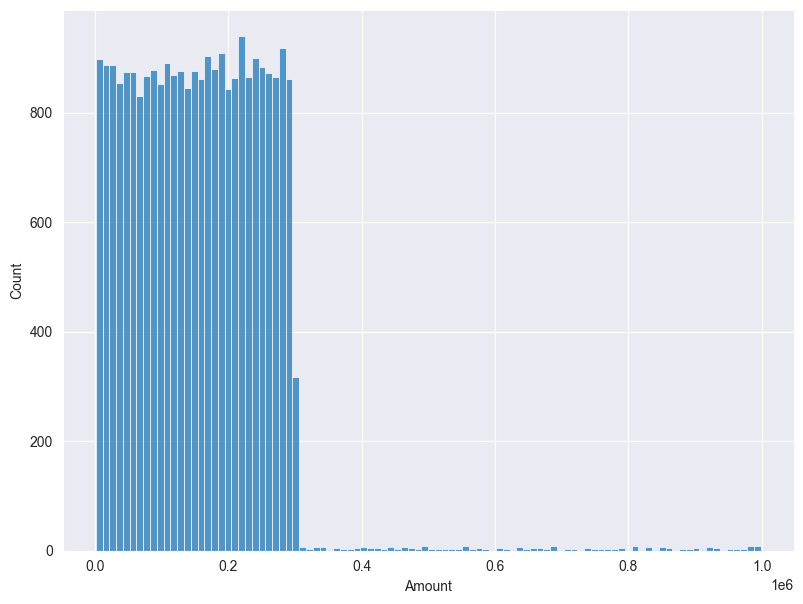

In [26]:
# Analisando graficamente os valores dos gastos:

sns.set_style('darkgrid')
figura, graficos = plt.subplots(sharex=True, figsize=(8,6))
plt.tight_layout()

sns.histplot(data=df_ds, x=df_ds['Amount'])

In [33]:
# grouped_df_card = df_ds.groupby('Card Type')
# grouped_df_gender = grouped_df_card.groupby('Gender')
# grouped_df_gender.head()

grouped_df_gender = df_ds.groupby(['Card Type', 'Gender'])
grouped_df_gender.head()



,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
5,5,"Delhi, India",8-Sep-14,Silver,Bills,F,100036
6,6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250
7,7,"Greater Mumbai, India",26-Jun-14,Platinum,Bills,F,150980
8,8,"Delhi, India",28-Mar-14,Silver,Bills,F,192247
9,9,"Delhi, India",1-Sep-14,Platinum,Bills,F,67932


In [31]:
# Agrupar por sexo, tipo de cartão e cidade
grouped_df = df_ds.groupby(['City', 'Gender', 'Card Type'])

# Calcular a média da coluna 'Amount' para cada grupo
gender_card_means = grouped_df['Amount'].mean().unstack()

# Mostrar apenas os 20 primeiros resultados
gender_card_means.head(20)


Card Type                     Gold  Platinum  Signature    Silver
City              Gender                                         
Achalpur, India   F      132576.00 178612.00  216180.00 201032.00
                  M      207420.00       NaN  165412.50       NaN
Adilabad, India   F            NaN 278272.00  242775.00 122336.00
                  M       49020.00 108313.00  149233.67       NaN
Adityapur, India  F      209829.00       NaN  296944.00       NaN
                  M      138440.50  17703.00        NaN 162636.00
Adoni, India      F      195610.50  40082.00  169621.00 196409.00
                  M      239411.00       NaN  171101.00       NaN
Adoor, India      F        6536.00       NaN  150978.50   8944.00
                  M            NaN 131051.50   68185.00       NaN
Afzalpur, India   F       54048.00 156617.00  153521.33       NaN
                  M       35627.00  64737.00    3542.00       NaN
Agartala, India   M            NaN  54469.00        NaN 194031.00
Agra, India       M            NaN 142947.50        NaN       NaN
Ahmedabad, India  F      173192.06 174406.06  166164.41 167409.08
                  M      154030.76 151704.74  153828.17 156400.58
Ahmednagar, India F      140295.00       NaN        NaN       NaN
                  M      181093.00       NaN        NaN  53901.00
Aizawl, India     F            NaN       NaN  167467.00       NaN
                  M      215508.00       NaN  219299.00 241529.00

# Conclusão

Depois de analisar os dados sobre as transações de cartão de crédito na Índia obtidas na plataforma Kaggle, podemos sugerir o lançamento do Cartão de Crédito TAJ MAHAL.

Algumas informações levantadas na análise dos dados:

- A análise foi realizada num período de 599 dias (04/10/2013 à 26/05/2015);
- 77,23% das transações estão concentradas em 12 cidades, sendo que as 4 primeiras concentram as maiores transações, tanto dos homens como das mulheres, em ordem diversa;
- Os homens gastam mais com combustíveis e comida, enquanto as mulheres com comida e contas diversas;
- O cartão preferido dos homens é o Platinum e o das mulheres é o Silver;
- O valor da menor transação é similar entre homens e mulheres, em torno de 1015 rupias indianas.     Já o valor da maior transação dos homens, está dentro da média, em torno de 300 mil rupias indianas, mas o valor das mulheres é de 999 mil rupias indianas;
- O volume de transações das mulheres é 10,5% maior que dos homens;
- Quanto aos tipos de gastos, no geral gasta-se mais com comida e menos com viagens;
- Quanto aos tipos de cartão, há um equilíbrio entre os 4 tipos;
- 30% das transações são em torno de 900 mil rupias indianas (R$ 54.900,00).

A moeda da Índia é a Rupia Indiana.
Uma Rupia Índiana equivale a 0,061 Reais (Cotação de 01/04/24).
Sugestão de nome para um novo Cartão de Crédito = TAJ MAHAL.
Cidades sugeridas para lançar o Cartão de Crédito: Bengaluru, Greater Mumbai, Ahmedabad e Delhi.
Cartões sugeridos: Platinum para os homens e Silver para as mulheres, com limite de 300 mil rupias indianas (R$ 18.300,00).